Constained MOD
==============

This example demonstrates the use of [admm.cmod.CnstrMOD](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cmod.html#sporco.admm.cmod.CnstrMOD) for computing a dictionary update via a constrained variant of the method of optimal directions [[20]](http://sporco.rtfd.org/en/latest/zreferences.html#id20). This problem is mainly useful as a component within dictionary learning, but its use is demonstrated here since a user may wish to construct such objects as part of a custom dictionary learning algorithm, using [dictlrn.DictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.dictlrn.html#sporco.dictlrn.dictlrn.DictLearn).

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import bpdn
from sporco.admm import cmod
from sporco import util
from sporco import array
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])

Extract all 8x8 image blocks, reshape, and subtract block means.

In [3]:
S = array.extract_blocks((S1, S2, S3, S4, S5), (8, 8))
S = np.reshape(S, (np.prod(S.shape[0:2]), S.shape[2]))
S -= np.mean(S, axis=0)

Load initial dictionary.

In [4]:
D0 = util.convdicts()['G:8x8x64']
D0 = np.reshape(D0, (np.prod(D0.shape[0:2]), D0.shape[2]))

Compute sparse representation on current dictionary.

In [5]:
lmbda = 0.1
opt = bpdn.BPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                         'RelStopTol': 1e-3})
b = bpdn.BPDN(D0, S, lmbda, opt)
X = b.solve()

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------


   0  2.68e+04  2.07e+04  6.15e+04  3.57e-01  2.33e+00  6.00e+00


   1  2.48e+04  1.74e+04  7.39e+04  1.49e-01  1.02e+00  6.00e+00


   2  2.40e+04  1.62e+04  7.80e+04  8.52e-02  6.64e-01  6.00e+00
   3  2.35e+04  1.54e+04  8.06e+04  6.04e-02  5.31e-01  6.00e+00


   4  2.32e+04  1.50e+04  8.21e+04  4.53e-02  4.28e-01  6.00e+00
   5  2.30e+04  1.46e+04  8.32e+04  3.59e-02  3.68e-01  6.00e+00


   6  2.28e+04  1.44e+04  8.40e+04  2.92e-02  3.17e-01  6.00e+00
   7  2.27e+04  1.42e+04  8.46e+04  2.45e-02  2.81e-01  6.00e+00


   8  2.26e+04  1.41e+04  8.51e+04  2.08e-02  2.50e-01  6.00e+00
   9  2.25e+04  1.40e+04  8.55e+04  1.80e-02  2.26e-01  6.00e+00


  10  2.23e+04  1.35e+04  8.74e+04  6.77e-02  1.82e-01  1.20e+00
  11  2.22e+04  1.34e+04  8.81e+04  5.10e-02  1.30e-01  1.20e+00


  12  2.21e+04  1.33e+04  8.81e+04  3.72e-02  9.44e-02  1.20e+00
  13  2.21e+04  1.33e+04  8.81e+04  2.77e-02  7.19e-02  1.20e+00


  14  2.21e+04  1.32e+04  8.83e+04  2.11e-02  5.61e-02  1.20e+00
  15  2.21e+04  1.32e+04  8.84e+04  1.65e-02  4.48e-02  1.20e+00


  16  2.21e+04  1.32e+04  8.85e+04  1.30e-02  3.64e-02  1.20e+00
  17  2.20e+04  1.32e+04  8.85e+04  1.05e-02  3.00e-02  1.20e+00


  18  2.20e+04  1.32e+04  8.86e+04  8.55e-03  2.51e-02  1.20e+00


  19  2.20e+04  1.32e+04  8.86e+04  7.07e-03  2.13e-02  1.20e+00


  20  2.20e+04  1.32e+04  8.87e+04  1.36e-02  1.74e-02  4.89e-01
  21  2.20e+04  1.32e+04  8.88e+04  1.14e-02  1.34e-02  4.89e-01


  22  2.20e+04  1.31e+04  8.88e+04  9.16e-03  1.00e-02  4.89e-01


  23  2.20e+04  1.31e+04  8.89e+04  7.23e-03  7.61e-03  4.89e-01


  24  2.20e+04  1.31e+04  8.89e+04  5.65e-03  5.88e-03  4.89e-01


  25  2.20e+04  1.31e+04  8.89e+04  4.42e-03  4.61e-03  4.89e-01


  26  2.20e+04  1.31e+04  8.89e+04  3.48e-03  3.66e-03  4.89e-01


  27  2.20e+04  1.31e+04  8.89e+04  2.75e-03  2.94e-03  4.89e-01


  28  2.20e+04  1.31e+04  8.89e+04  2.20e-03  2.38e-03  4.89e-01


  29  2.20e+04  1.31e+04  8.89e+04  1.76e-03  1.95e-03  4.89e-01


  30  2.20e+04  1.31e+04  8.89e+04  1.95e-03  1.59e-03  3.29e-01


  31  2.20e+04  1.31e+04  8.89e+04  1.64e-03  1.26e-03  3.29e-01


  32  2.20e+04  1.31e+04  8.89e+04  1.36e-03  9.99e-04  3.29e-01


  33  2.20e+04  1.31e+04  8.89e+04  1.11e-03  7.99e-04  3.29e-01


  34  2.20e+04  1.31e+04  8.89e+04  9.05e-04  6.45e-04  3.29e-01
----------------------------------------------------------------


Update dictionary for training image set.

In [6]:
opt = cmod.CnstrMOD.Options({'Verbose': True, 'MaxMainIter': 100,
                             'RelStopTol': 1e-3, 'rho': 4e2})
c = cmod.CnstrMOD(X, S, None, opt)
D1 = c.solve()
print("CMOD solve time: %.2fs" % c.timer.elapsed('solve'))

Itn   DFid      Cnstr     r         s         ρ       
------------------------------------------------------
   0  1.13e+04  6.86e-07  4.56e-01  2.38e+00  4.00e+02
   1  1.12e+04  7.37e-07  2.08e-01  2.09e-01  4.00e+02
   2  1.12e+04  7.79e-07  1.01e-01  7.24e-02  4.00e+02
   3  1.12e+04  7.73e-07  4.97e-02  3.14e-02  4.00e+02
   4  1.12e+04  7.00e-07  2.72e-02  1.44e-02  4.00e+02
   5  1.12e+04  6.73e-07  1.53e-02  8.43e-03  4.00e+02
   6  1.12e+04  7.52e-07  8.87e-03  4.74e-03  4.00e+02
   7  1.12e+04  7.31e-07  5.22e-03  3.04e-03  4.00e+02
   8  1.12e+04  8.13e-07  3.12e-03  1.91e-03  4.00e+02
   9  1.12e+04  7.16e-07  1.88e-03  1.29e-03  4.00e+02
  10  1.12e+04  7.56e-07  1.15e-03  8.55e-04  4.00e+02
  11  1.12e+04  7.63e-07  7.08e-04  5.95e-04  4.00e+02
------------------------------------------------------
CMOD solve time: 0.11s


Display initial and final dictionaries.

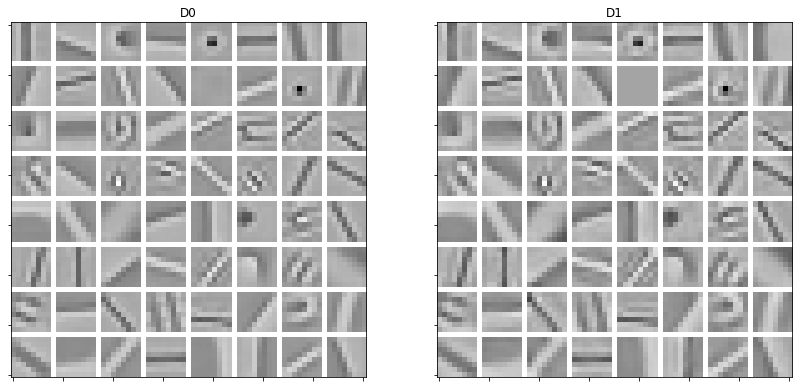

In [7]:
D0 = D0.reshape((8, 8, D0.shape[-1]))
D1 = D1.reshape((8, 8, D1.shape[-1]))
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from CMOD solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

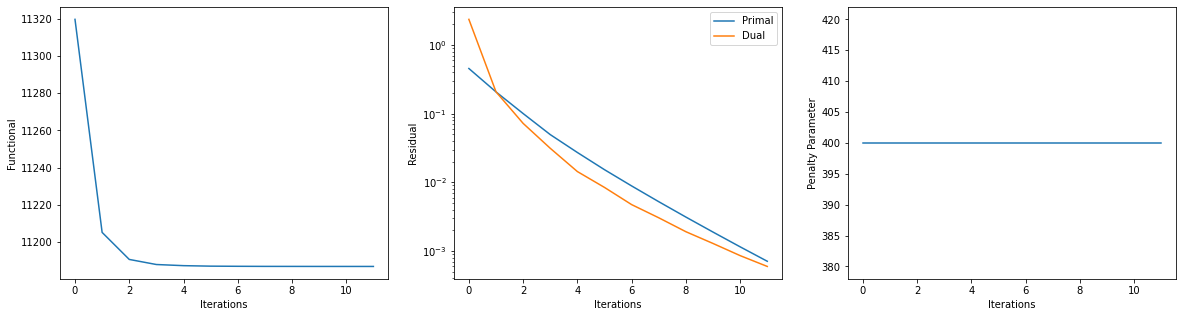

In [8]:
its = c.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.DFid, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()